# Visuals based on Physical Activity {-}


## Acronym {-}
   
* **PA**: physical activity
* **AC**: activity count

## Previous Analysis {-}

We assessed PA on at least 3 days (5 days max) including one weekend day and 2 weekdays. We exclude incomplete days (*i.e.*, less than 24hours), including the first and the last day. The days, whose total activity count were less than 250, where also excluded. We created a data set containing:
   
* **Average AC per day**
* **Total average daily steps**
* **Average Time spent in sedentary, light, moderate and vigorous activity** 


Specifically, “Physical activity was assessed on at least three days (one weekend day, and two weekdays).  Total activity counts (AC) per day over the course of time with which the monitor was worn were calculated. Then, to derive average total AC per day, this number was divided by the total
number of valid days worn. Ultimately, total average daily steps, as well as the time that was spent in sedentary, light, moderate, and strenuous activity was provided.”


### References {-}
      
* Markers of branched-chain amino acid catabolism are not affected by exercise training in pregnant women with obesity
Brittany R. Allman, Beverly J. Spray, Kelly E. Mercer, Aline Andres, and Elisabet Børsheim
Journal of Applied Physiology 2021 130:3, 651-659; [https://doi.org/10.1152/japplphysiol.00673.2020](https://doi.org/10.1152/japplphysiol.00673.2020)
* Diaz, EC, Cleves, MA, DiCarlo, M, et al. Parental adiposity differentially associates with newborn body composition. Pediatric Obesity. 2020; 15:e12596. [https://doi.org/10.1111/ijpo.12596](https://doi.org/10.1111/ijpo.12596)


## Objective {-}

Create a function to visualize summerized activity data across covariates:   
   
* *BMI category*
* *active-status*
* *multipara*
* *race*
* *intervention group*
* *age*
* *BMI*

In [1]:
## Load input: packages, external functions, input data.

In [2]:
### Packages

In [3]:
############
# PACKAGES #
###########

using DataFrames, Dates, CSV, Missings, CategoricalArrays
using PyPlot, StatsBase, Statistics, FreqTables
PyPlot.svg(true)
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

PyObject <matplotlib.pyplot._IoffContext object at 0x0000000051BBFE50>

In [4]:
### External Functions

In [5]:
######################
# External Functions #
######################

# Include the modules directory
dirFun = realpath(string(@__DIR__,"/../src/"))
include(dirFun*"/ActTools.jl");
include(dirFun*"/ActStatData.jl"); # include(dirFun*"/ActPlotData.jl"))
include(dirFun*"/GetBio.jl");
include(dirFun*"/ActDisplay.jl");


In [6]:
### Data

In [7]:
# List of visit directories
listDir = ["/../data/data_processed/"]

# Visit Dictionary 
dictVisitName =  Dict(1=>"VisitBaseline",
                    2=>"Visit32w",
                    3=>"Visit6wPP",
                    4=>"Visit6mPP",
                    5=>"Visit12mPP");

# Load the group assignment information
groupFileName = realpath(joinpath("..", "data", "Group", "group_assignement.csv"))
global dfGroup = CSV.read(groupFileName, DataFrame);

sort!(dfGroup);

# output directory
outDir = "../../data/data_processed/";


# Extract data for one visit:

visit = 1
# Get the path of the directory 
myDir = abspath(string(@__DIR__,listDir[visit]))

# Read demographic infromation:

# Load the group assignment information
demogFileName = realpath(joinpath(@__DIR__, "..","data","Group","Accelero_Demog_Extract.csv"))
dfDemog = CSV.read(demogFileName, DataFrame);
rename!(dfDemog, Dict(:StudyID => "studyID"));
# Merge  "Native Hawaiian or Other" and "American Indian/ Alaska N" with "Other"
idxChange2Other =  findall((dfDemog.Race .== "Native Hawaiian or Other") .|| (dfDemog.Race .== "American Indian/ Alaska N"))
dfDemog.Race[idxChange2Other] .= "Other";

In [8]:
# Read activity summary data for the VBaseline and 32 weeks visits:

# Baseline
fileName = joinpath(myDir,string("AvgSummary_",dictVisitName[1],".csv"))
dfAvgBaseline = dropmissing(CSV.read(fileName, DataFrame)); # remove missing ID

# 32 weeks
fileName = joinpath(myDir,string("AvgSummary_",dictVisitName[2],".csv"))
dfAvg32weeks = dropmissing(CSV.read(fileName, DataFrame)); # remove missing ID

# Join Demographic information 
dfAvgBaseline = leftjoin(dfAvgBaseline, dfDemog, on = :studyID);
dfAvg32weeks = leftjoin(dfAvg32weeks, dfDemog, on = :studyID);

In [9]:
# Find study ID where BMI is missing:

dfAvgBaseline.studyID[findall(x -> x === missing, dfAvgBaseline.BMICategory)];
dfAvg32weeks.studyID[findall(x -> x === missing, dfAvg32weeks.BMICategory)];

# Drop missing:

dfAvgBaseline = dropmissing(dfAvgBaseline); # remove missing ID
dfAvg32weeks = dropmissing(dfAvg32weeks); # remove missing ID

## Results {-}

In the following tables, headers are defined as following:  
    
    
* **nrow:** total number of individuals per category
* **AvgSedentary:** average percentage of time during 24 hours spent in sedentary activity (*e.g.*, sleeping or resting)
* **AvgLight:** average percentage of time during 24 hours spent in light activity (*e.g.*, walking slowly, preparing food, or sitting at a computer)
* **AvgModerate:** average percentage of time during 24 hours spent in moderate activity (*e.g.*, walking briskly, sweeping floor, shooting a basketball)
* **AvgVigorous:** average percentage of time during 24 hours spent in vigorous activity (*e.g.*, running or swimming)

###  BMI Category{-}

#### Baseline visit {-}
</br>

     

,BMICategory,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String15,Int64,Float64,Float64,Float64,Float64
1,Normal,83,50.28,42.5,7.15,0.07
2,Obese,73,51.85,40.43,7.69,0.03
3,Overweight,108,50.9,40.9,8.17,0.03


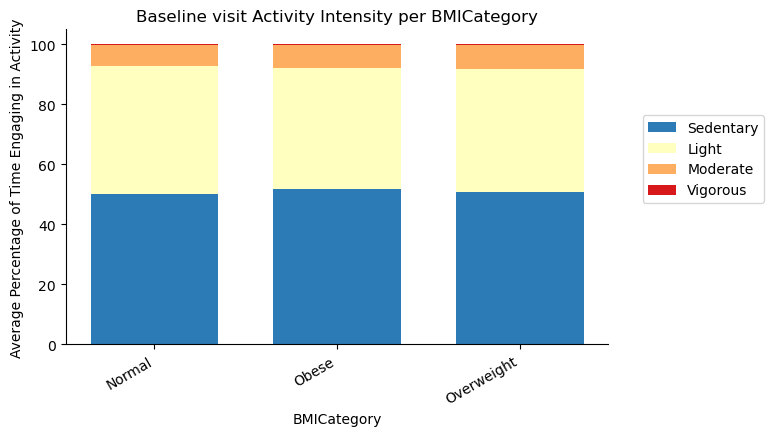

In [10]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :BMICategory, [:AvgAC])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :BMICategory, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true);
display(df1);

plotCatActLvlSummary(df1, "Baseline visit ")

#### 32 weeks visit {-}


    

,BMICategory,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String15,Int64,Float64,Float64,Float64,Float64
1,Normal,64,49.69,43.08,7.21,0.02
2,Obese,46,49.29,43.4,7.3,0.01
3,Overweight,72,50.45,41.36,8.16,0.03


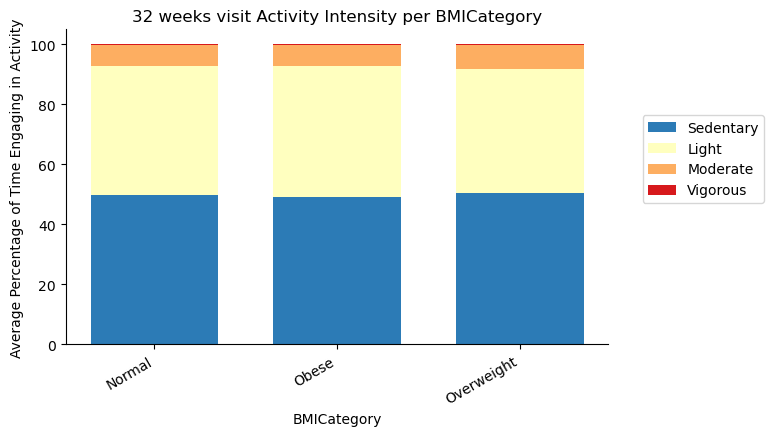

In [11]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :BMICategory, [:AvgAC])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :BMICategory, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true, ismedian = false);
display(df2);

plotCatActLvlSummary(df2, "32 weeks visit ")

### Active Status {-}

#### Baseline visit {-}

,active_status,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String15,Int64,Float64,Float64,Float64,Float64
1,Active,132,726.838,603.395,109.065,0.701515
2,Co-Active,126,744.614,583.502,111.418,0.465079
3,Retired,6,664.983,622.617,152.067,0.333333


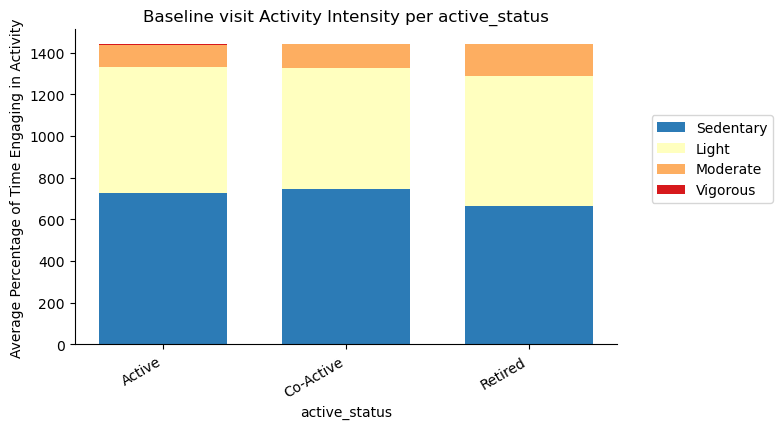

In [12]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :active_status, [:AvgSteps])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :active_status, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= false)
display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

#### 32 weeks visit {-}

,active_status,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String15,Int64,Float64,Float64,Float64,Float64
1,Active,88,717.421,621.136,101.256,0.186364
2,Co-Active,89,726.946,599.598,113.115,0.342135
3,Retired,5,585.04,661.88,192.32,0.76


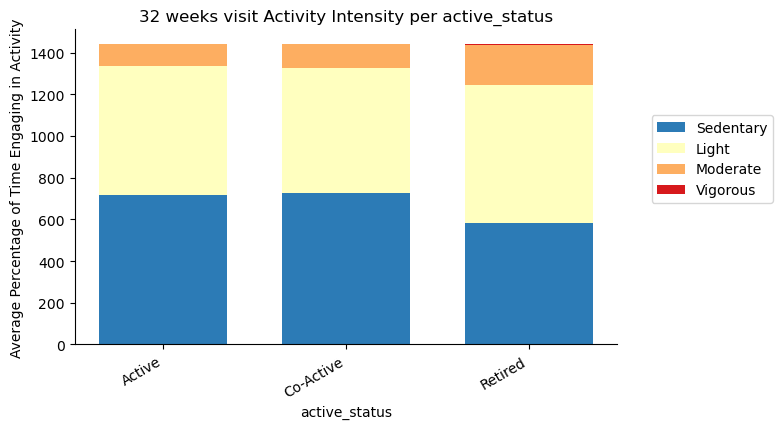

In [13]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :active_status, [:AvgSteps])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :active_status, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= false)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

### Multipara {-}

#### Baseline visit {-}

,PreviousLiveBirth,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String3,Int64,Float64,Float64,Float64,Float64
1,No,119,51.8,40.77,7.38,0.05
2,Yes,145,50.28,41.69,8.0,0.03


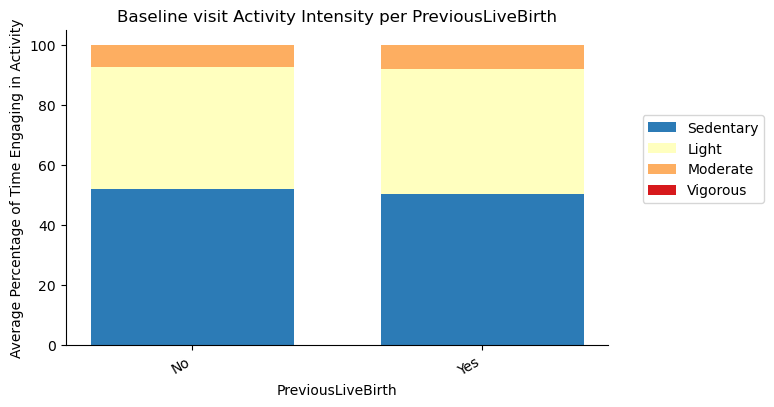

In [14]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :PreviousLiveBirth, [:AvgSteps])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :PreviousLiveBirth, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

#### 32 weeks visit {-}

,PreviousLiveBirth,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String3,Int64,Float64,Float64,Float64,Float64
1,No,80,51.4,41.19,7.39,0.02
2,Yes,102,48.71,43.49,7.78,0.02


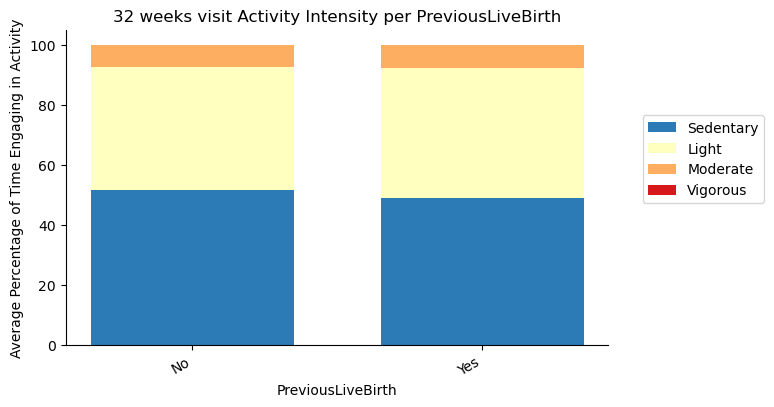

In [15]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :PreviousLiveBirth, [:AvgSteps])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :PreviousLiveBirth, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

### Race{-}

#### Baseline visit {-}

,Race,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String31,Int64,Float64,Float64,Float64,Float64
1,Asian,8,51.42,39.09,9.36,0.13
2,Black or African American,42,50.84,41.47,7.66,0.03
3,Mixed race,11,48.71,41.97,9.25,0.07
4,Other,22,51.61,41.43,6.95,0.01
5,White,181,51.04,41.26,7.66,0.04


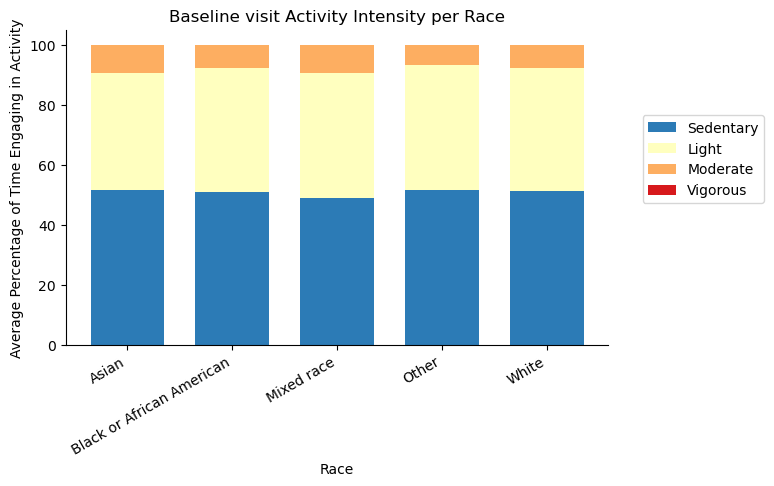

In [16]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :Race, [:AvgSteps])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :Race,
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

#### 32 weeks visit {-}

,Race,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String31,Int64,Float64,Float64,Float64,Float64
1,Asian,8,54.77,39.05,6.18,0.0
2,Black or African American,27,52.97,41.27,5.75,0.01
3,Mixed race,8,48.99,43.79,7.21,0.01
4,Other,12,45.58,47.84,6.56,0.02
5,White,127,49.39,42.37,8.22,0.02


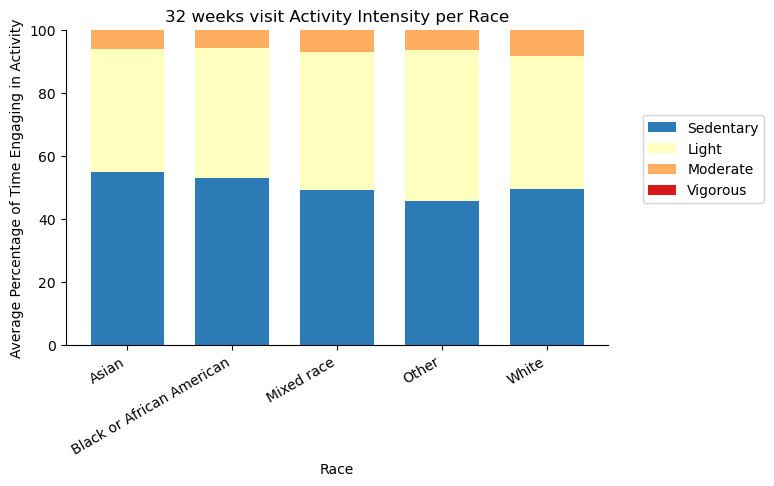

In [17]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :Race, [:AvgSteps])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :Race, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

### Intervention Group{-}

#### Baseline visit {-}

,Arm,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String15,Int64,Float64,Float64,Float64,Float64
1,GWG,90,49.75,42.24,7.98,0.03
2,GWG+PPWL,92,50.76,41.06,8.11,0.07
3,PPWL,82,52.54,40.45,7.0,0.01


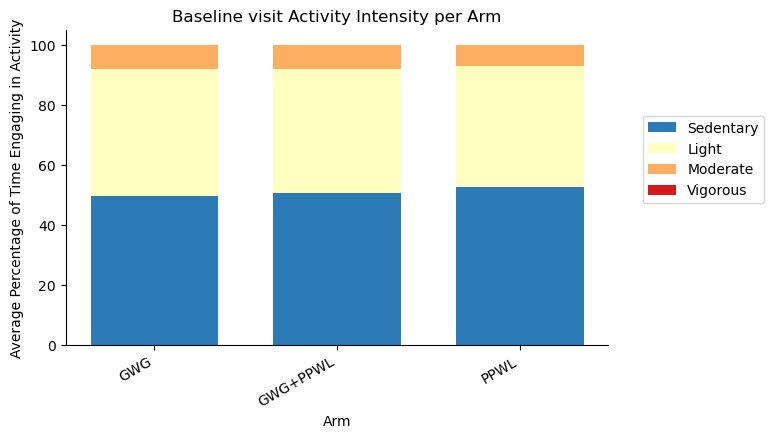

In [18]:
# df1 = getCatActSummary(deepcopy(dfAvgBaseline), :Arm, [:AvgSteps])
df1 = getCatActSummary(deepcopy(dfAvgBaseline), :Arm,
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df1)
plotCatActLvlSummary(df1, "Baseline visit ")

#### 32 weeks visit {-}

,Arm,nrow,AvgSedentary,AvgLight,AvgModerate,AvgVigorous
,String15,Int64,Float64,Float64,Float64,Float64
1,GWG,60,49.74,43.39,6.85,0.02
2,GWG+PPWL,60,49.66,42.49,7.82,0.03
3,PPWL,62,50.26,41.59,8.13,0.02


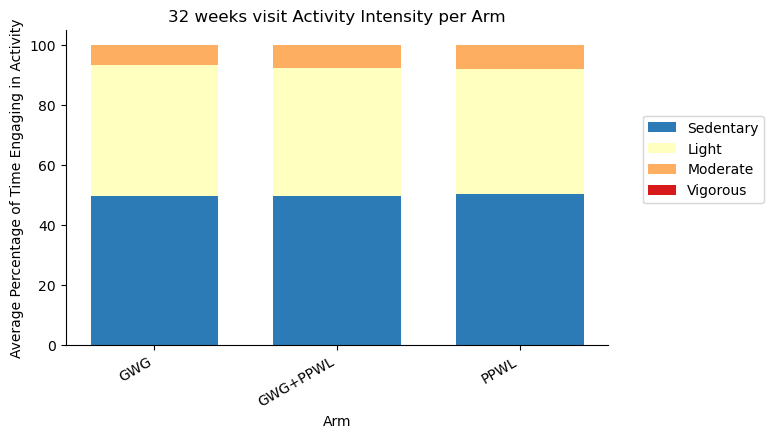

In [19]:
# df2 = getCatActSummary(deepcopy(dfAvg32weeks), :Arm, [:AvgSteps])
df2 = getCatActSummary(deepcopy(dfAvg32weeks), :Arm, 
                 [:AvgSedentary, :AvgLight, :AvgModerate, :AvgVigorous],
                 compPerc= true)
display(df2)
plotCatActLvlSummary(df2, "32 weeks visit ")

### Age{-}

In the following scatter plots, the x-axis represents the age and the y-axis represents the average of the accumulated activity count per day. The accumulated activity counts per day reflects the total amount of activity across all intensities level.    
The size of the dot is weighted by the average of the daily accumulated number of steps. The higher the number of steps, the wider the dot will be.
The red line represents the mean of the daily accumulated activity count in average across the all population.


#### Baseline visit {-}

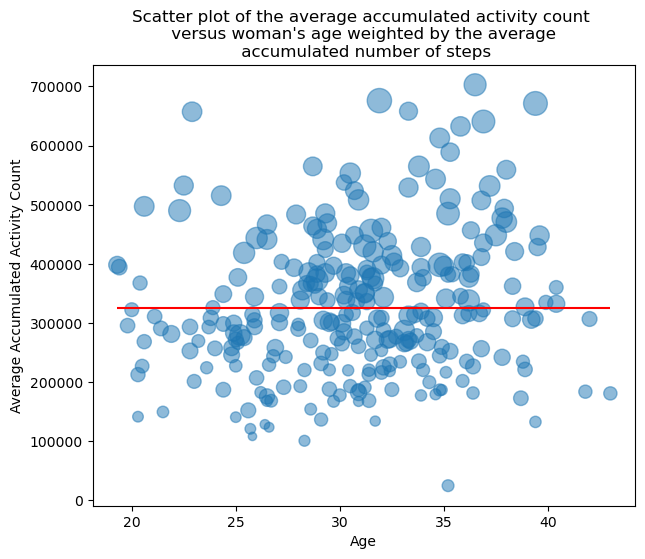

In [20]:
figA = figure("pyplot_barplot",figsize=(7,7))
scatter(dfAvgBaseline.age, dfAvgBaseline.AvgAC,s=dfAvgBaseline.AvgSteps./100 ,  alpha=0.5)
hlines(mean(dfAvgBaseline.AvgAC), minimum(dfAvgBaseline.age), maximum(dfAvgBaseline.age), colors="red", linestyles="solid")
xlabel("Age")
ylabel("Average Accumulated Activity Count")
title("Scatter plot of the average accumulated activity count \n versus woman's age weighted by the average \n accumulated number of steps")
figA.autofmt_xdate(bottom=0.25,rotation=0,ha="center")


#### 32 weeks visit {-}

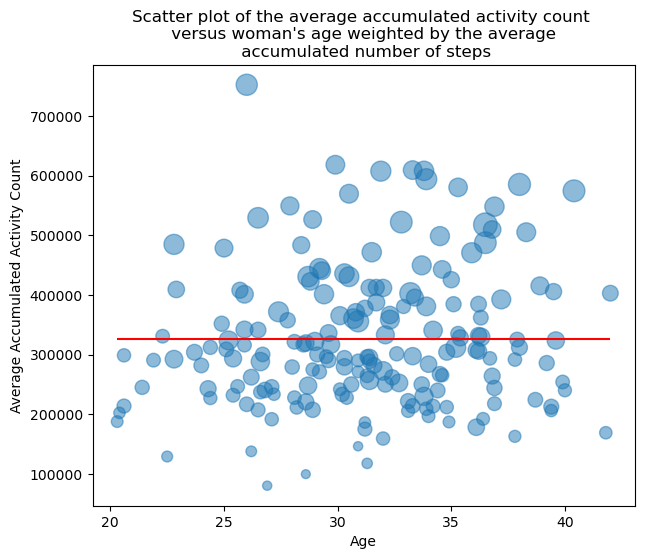

In [21]:
figA = figure("pyplot_barplot",figsize=(7,7))
scatter(dfAvg32weeks.age, dfAvg32weeks.AvgAC,s=dfAvg32weeks.AvgSteps./100 ,  alpha=0.5)
hlines(mean(dfAvg32weeks.AvgAC), minimum(dfAvg32weeks.age), maximum(dfAvg32weeks.age), colors="red", linestyles="solid")
xlabel("Age")
ylabel("Average Accumulated Activity Count")
title("Scatter plot of the average accumulated activity count \n versus woman's age weighted by the average \n accumulated number of steps")
figA.autofmt_xdate(bottom=0.25,rotation=0,ha="center")


### BMI{-}

In the following scatter plots, the x-axis represents the BMI and the y-axis represents the average of the accumulated activity count per day. The accumulated activity counts per day reflects the total amount of activity across all intensities level.    
The size of the dot is weighted by the average of the daily accumulated number of steps. The higher the number of steps, the wider the dot will be.
The red line represents the mean of the daily accumulated activity count in average across the all population.


#### Baseline visit {-}

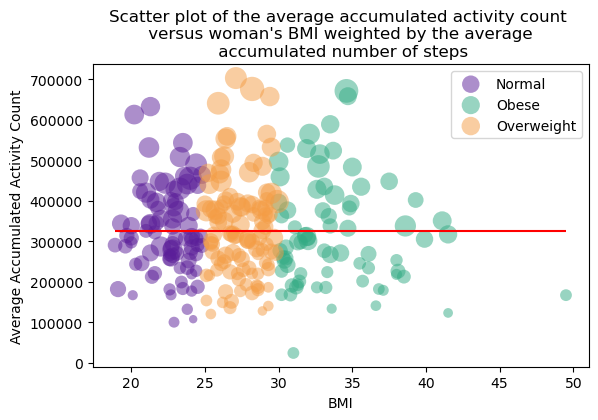

In [22]:
myColor = ["#5b1e99", "#33ab84", "#f49d45"]
vName = sort(unique(dfAvgBaseline.BMICategory))
# vZ1 = zeros(Int64, size(df1)[1]);
vZ1 = repeat(["abc"], size(dfAvgBaseline)[1]);

for i in 1:size(dfAvgBaseline)[1]
   vZ1[i] = myColor[findall(x -> x == dfAvgBaseline.BMICategory[i], vName)[1]]
end

fig, ax = plt.subplots()
for i in 1:3

    df = filter(row -> row.BMICategory == vName[i],dfAvgBaseline)
    x = df.BMI
    y = df.AvgAC
    
    ax.scatter(x, y, s=df.AvgSteps./100, 
                c=myColor[i], label=vName[i],
                alpha=0.5, edgecolors="none")
end

ax.legend(loc="upper right")

hlines(mean(dfAvgBaseline.AvgAC), minimum(dfAvgBaseline.BMI), maximum(dfAvgBaseline.BMI), colors="red", linestyles="solid")
xlabel("BMI")
ylabel("Average Accumulated Activity Count")
title("Scatter plot of the average accumulated activity count \n versus woman's BMI weighted by the average \n accumulated number of steps")


fig.autofmt_xdate(bottom=0.25,rotation=0,ha="center")

#### 32 weeks visit {-}

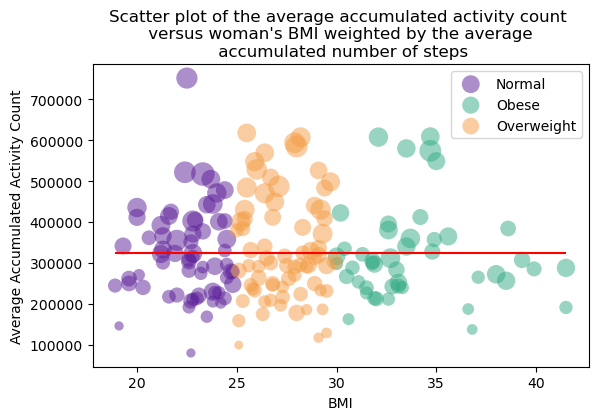

In [23]:
# vZ2 = zeros(Int64, size(df2)[1]);
vZ2 = repeat(["abc"], size(dfAvg32weeks)[1]);
for i in 1:size(dfAvg32weeks)[1]
   vZ2[i] = myColor[findall(x -> x == dfAvg32weeks.BMICategory[i], vName)[1]]
end

fig, ax = plt.subplots()
for i in 1:3

    df = filter(row -> row.BMICategory == vName[i],dfAvg32weeks)
    x = df.BMI
    y = df.AvgAC
    
    ax.scatter(x, y, s=df.AvgSteps./100, 
                c=myColor[i], label=vName[i],
                alpha=0.5, edgecolors="none")
end

ax.legend()

hlines(mean(dfAvg32weeks.AvgAC), minimum(dfAvg32weeks.BMI), maximum(dfAvg32weeks.BMI), colors="red", linestyles="solid")
xlabel("BMI")
ylabel("Average Accumulated Activity Count")
title("Scatter plot of the average accumulated activity count \n versus woman's BMI weighted by the average \n accumulated number of steps")


fig.autofmt_xdate(bottom=0.25,rotation=0,ha="center")